In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df = df.rename(columns={'Genre':'gender','Annual Income (k$)': 'annual_income', 'Spending Score (1-100)':'spending_score'})

In [7]:
df.head()

,CustomerID,gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df['gender'].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

<Axes: xlabel='count', ylabel='gender'>

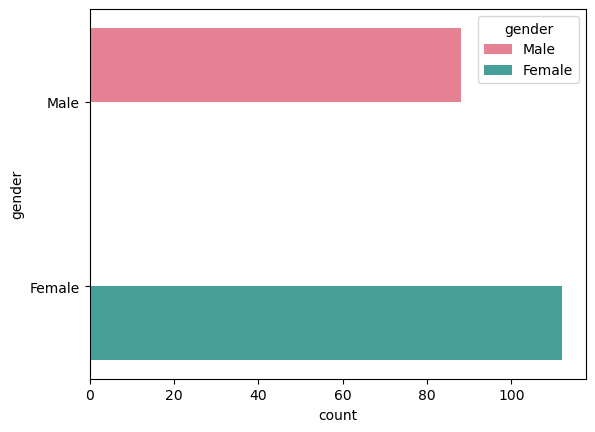

In [11]:
sns.countplot(y='gender', data=df, palette='husl', hue='gender')

In [12]:
df['gender'].replace(['Female','Male'],[0,1],inplace=True)
df.gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: gender, Length: 200, dtype: int64

C:\Users\Aniket Singh\AppData\Local\Temp\ipykernel_13928\2442021471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=20,kde=True)


<Axes: xlabel='Age', ylabel='Density'>

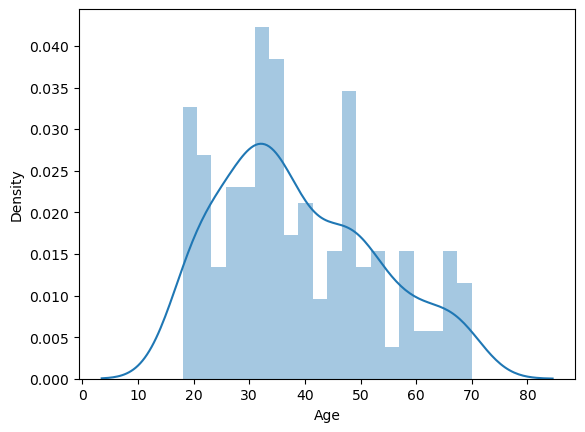

In [13]:
sns.distplot(df['Age'],bins=20,kde=True)

C:\Users\Aniket Singh\AppData\Local\Temp\ipykernel_13928\3418470709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_income'], bins=20, kde=True)


<Axes: xlabel='annual_income', ylabel='Density'>

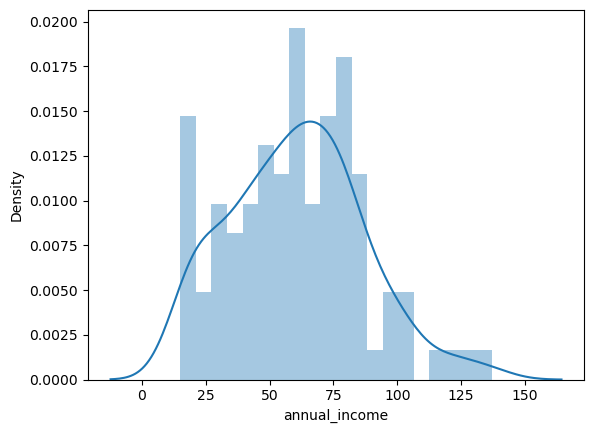

In [14]:
sns.distplot(df['annual_income'], bins=20, kde=True)

C:\Users\Aniket Singh\AppData\Local\Temp\ipykernel_13928\51957949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['spending_score'], bins=20, kde=True)


<Axes: xlabel='spending_score', ylabel='Density'>

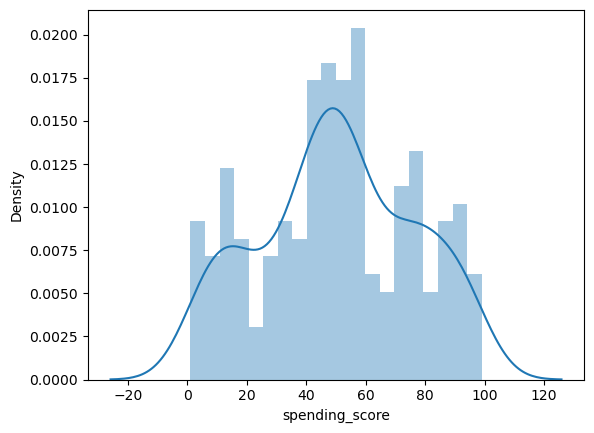

In [15]:
sns.distplot(df['spending_score'], bins=20, kde=True)

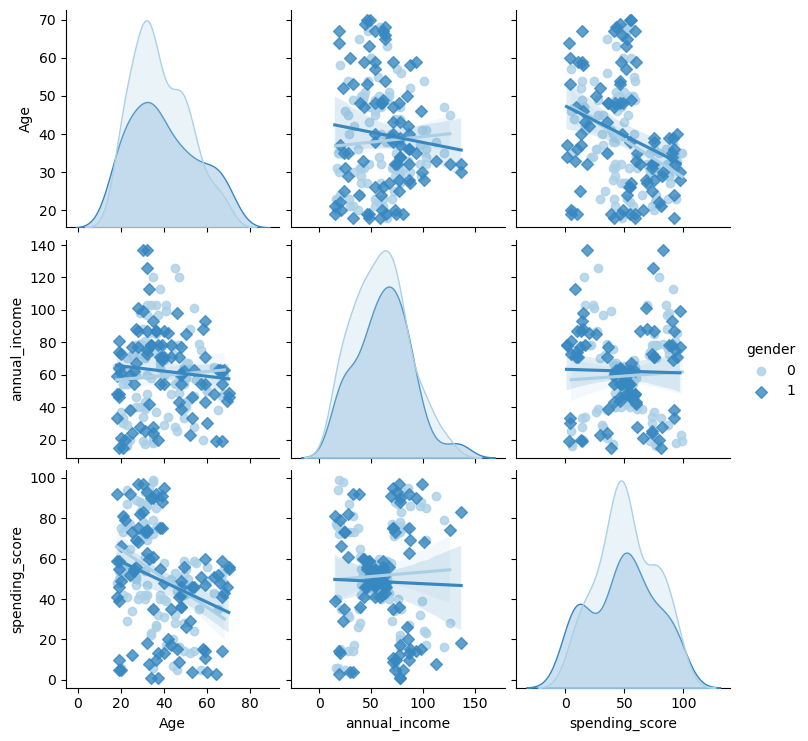

In [16]:

sns.pairplot(df, vars=['Age', 'annual_income', 'spending_score'] , kind='reg',hue='gender', palette='Blues', markers = ['o', 'D'] )

In [17]:
segmentation_data =df[['Age', 'annual_income','spending_score']]

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(segmentation_data)

C:\Users\Aniket Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aniket Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
df2=df
df2['Segment'] = kmeans.labels_

In [22]:
segmentated_data=df2[['Age', 'gender', 'spending_score','Segment']]

In [24]:
segmentated_data.head()

,Age,gender,spending_score,Segment
0,19,1,39,2
1,21,1,81,2
2,20,0,6,2
3,23,0,77,2
4,31,0,40,2


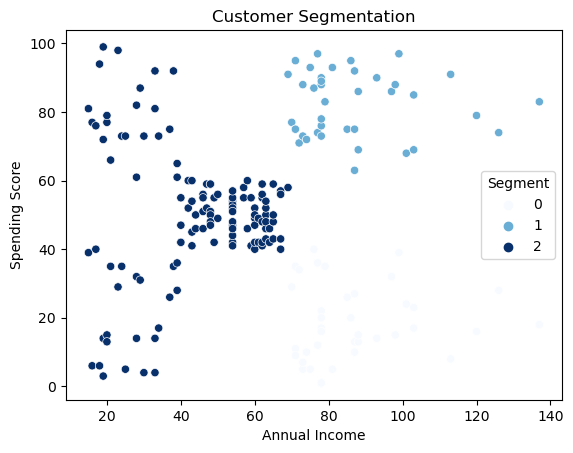

In [25]:
sns.scatterplot(data=df2, x='annual_income', y='spending_score', hue='Segment', palette='Blues')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()